<a href="https://colab.research.google.com/github/kcat28/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 9: Choosing the best performing model on a dataset

Instructions:

- Use the Dataset File to train your model
- Use the Test File to generate your results
- Use the Sample Submission file to generate the same format
- Use all classification models

Submit your results to:
https://www.kaggle.com/competitions/playground-series-s4e10/overview



In [781]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Dataset File

In [782]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/train.csv?raw=true'
df = pd.read_csv(dataset_url)

# Data preprocessing

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [784]:
df.duplicated().sum()

0

In [785]:
df.isnull().sum()

,0
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


In [786]:
df.sample(20)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
14721,14721,23,35004,RENT,0.0,PERSONAL,A,5000,8.49,0.14,N,3,0
18262,18262,29,75000,MORTGAGE,1.0,MEDICAL,C,15000,12.84,0.20,Y,5,0
37001,37001,25,26000,RENT,0.0,HOMEIMPROVEMENT,B,9000,11.71,0.35,N,4,1
40143,40143,23,50000,MORTGAGE,2.0,DEBTCONSOLIDATION,B,2400,11.71,0.05,N,3,0
29828,29828,22,60000,MORTGAGE,1.0,PERSONAL,D,8000,15.31,0.13,N,4,0
36281,36281,29,48000,MORTGAGE,3.0,HOMEIMPROVEMENT,A,10000,7.49,0.21,N,8,0
20262,20262,22,117996,RENT,3.0,EDUCATION,A,16000,7.90,0.14,N,4,0
13513,13513,28,59000,RENT,0.0,HOMEIMPROVEMENT,D,4000,14.61,0.08,N,7,1
481,481,23,60000,RENT,5.0,EDUCATION,A,6000,9.32,0.10,N,4,0
17398,17398,41,63000,RENT,6.0,HOMEIMPROVEMENT,B,14000,10.59,0.23,N,13,0


In [787]:
df.drop('id', axis=1, inplace=True)

In [788]:
print(df['person_home_ownership'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [789]:
print(df['loan_grade'].unique())

['B' 'C' 'A' 'D' 'E' 'F' 'G']


In [790]:
print(df['loan_intent'].unique())

['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']


In [791]:
print(df['cb_person_default_on_file'].unique())

['N' 'Y']


In [792]:
ownership_mapping = {
    'OWN': 1,
    'MORTGAGE': 2,
    'RENT': 3,
    'OTHER': 4
}

grade_mapping = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 5,
    'F': 6,
    'G': 7
}

intent_mapping = {
    'PERSONAL': 1,
    'EDUCATION': 2,
    'MEDICAL': 3,
    'VENTURE': 4,
    'HOMEIMPROVEMENT': 5,
    'DEBTCONSOLIDATION': 6
}

person_file_mapping = {
    'Y': 1,
    'N': 2
}

df['person_home_ownership'] = df['person_home_ownership'].map(ownership_mapping)
df['loan_grade'] = df['loan_grade'].map(grade_mapping)
df['loan_intent'] = df['loan_intent'].map(intent_mapping)
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map(person_file_mapping)

In [793]:
df.sample()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
37335,38,78792,3,4.0,1,4,15000,15.21,0.19,1,16,0


In [794]:
scaler = StandardScaler()

numerical_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
num_df = df[numerical_features]

scaled_data = scaler.fit_transform(num_df)
df[numerical_features] = scaled_data


In [795]:
df.sample()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
51082,-0.920057,-0.106673,3,-0.177035,6,4,0.140632,1.272667,0.117378,1,-0.450108,1


#Feature selection

In [796]:
correlations = df.corr()['loan_status']

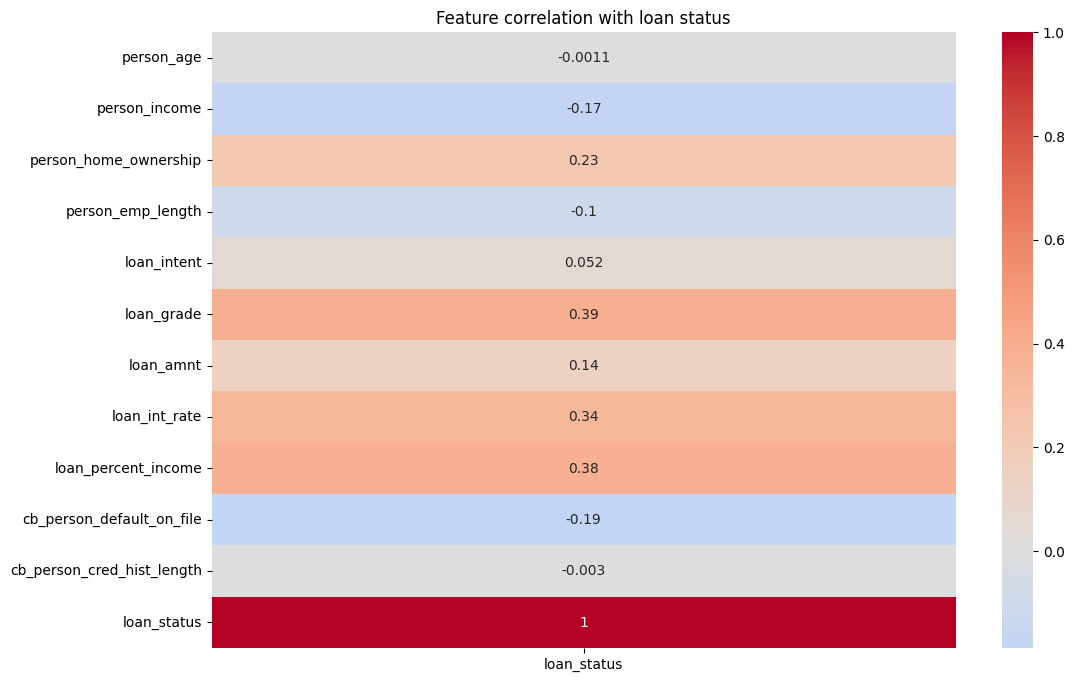

In [797]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlations.to_frame(), annot=True, cmap='coolwarm', center = 0)
plt.title('Feature correlation with loan status')
plt.show()

In [798]:
selected_features = ['loan_percent_income', 'loan_grade', 'loan_int_rate', 'cb_person_default_on_file', 'person_income']


In [799]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [800]:
X = df[selected_features]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                     feature        VIF
0        loan_percent_income   1.107692
1                 loan_grade  16.996018
2              loan_int_rate   5.378919
3  cb_person_default_on_file  14.086037
4              person_income   1.085819


In [801]:
selected_features = ['loan_percent_income', 'loan_grade', 'loan_int_rate', 'person_income']


In [802]:
X = df[selected_features]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

               feature       VIF
0  loan_percent_income  1.107631
1           loan_grade  1.217548
2        loan_int_rate  1.240638
3        person_income  1.085548


In [803]:
X = df[selected_features]
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Sample Submission File

In [804]:
sample_submission_url ='https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/sample_submission.csv?raw=true'

sf=pd.read_csv(sample_submission_url)

In [805]:
print(sf.columns)

Index(['id', 'loan_status'], dtype='object')


## Test File

In [806]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXERCISES/blob/main/datasets/loan_approval/test.csv?raw=true'
dt=pd.read_csv(test_url)

In [807]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 non-null  int64  
 2   person_income               39098 non-null  int64  
 3   person_home_ownership       39098 non-null  object 
 4   person_emp_length           39098 non-null  float64
 5   loan_intent                 39098 non-null  object 
 6   loan_grade                  39098 non-null  object 
 7   loan_amnt                   39098 non-null  int64  
 8   loan_int_rate               39098 non-null  float64
 9   loan_percent_income         39098 non-null  float64
 10  cb_person_default_on_file   39098 non-null  object 
 11  cb_person_cred_hist_length  39098 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.6+ MB


In [808]:
dt.drop('id', axis=1, inplace=True)

In [809]:
dt['person_home_ownership'] = dt['person_home_ownership'].map(ownership_mapping)
dt['loan_grade'] = dt['loan_grade'].map(grade_mapping)
dt['loan_intent'] = dt['loan_intent'].map(intent_mapping)
dt['cb_person_default_on_file'] = dt['cb_person_default_on_file'].map(person_file_mapping)

In [810]:
dt.sample()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1937,26,29000,3,2.0,1,4,4200,14.54,0.14,1,2


In [811]:
num_dt = dt[numerical_features]

dt_scaled_data = scaler.transform(num_dt)
dt[numerical_features] = dt_scaled_data

In [812]:
dt.sample()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29244,2.063452,3.188804,2,1.843294,6,2,-0.758041,-0.223377,-1.409489,2,2.279989


In [813]:
dt_selected = dt[selected_features]

In [814]:
dt_selected.sample()

,loan_percent_income,loan_grade,loan_int_rate,person_income
29786,0.22644,4,0.946437,0.868788


## 1. Train a KNN Classifier

In [815]:
score_list = {}

In [816]:
# put your answer here
KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)
knn_score = KNN.score(X_test,y_test)
print(f"Score is {knn_score}")

Score is 0.9007588029670048


- Perform cross validation

In [817]:
# put your answer here
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN, X, y, cv=5)
scores

array([0.89777475, 0.90152613, 0.9022082 , 0.90485122, 0.90340182])

In [818]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.00


In [819]:
score_list["KNN Classifier"] = scores.mean()

## 2. Train a Logistic Regression Classifier

In [820]:
# put your answer here
LR = LogisticRegression()
LR.fit(X_train,y_train)

lr_score = LR.score(X_test,y_test)
print(f"Score is {lr_score}")

Score is 0.8888225765197374


- Perform cross validation

In [821]:
# put your answer here
scores = cross_val_score(LR, X, y, cv=5)
scores

array([0.88635007, 0.8871174 , 0.88549748, 0.88728792, 0.88703214])

In [822]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.00


In [823]:
score_list["Logistic Regression"] = scores.mean()

## 3. Train a Naive Bayes Classifier

In [824]:
nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbc_score = nbc.score(X_test,y_test)

print(f"Score is {nbc_score}")

Score is 0.8820018756927275


- Perform cross validation

In [825]:
# put your answer here
scores = cross_val_score(nbc, X, y, cv=5)
scores

array([0.88404809, 0.88473016, 0.88345127, 0.88575326, 0.88362179])

In [826]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.88 accuracy with a standard deviation of 0.00


In [827]:
score_list["GaussianNBC"] = scores.mean()

## 4. Train a SVM Classifier

In [828]:
# put your answer here
svc = SVC()
svc.fit(X_train,y_train)
svc_score = svc.score(X_test,y_test)
print(f"Score is {svc_score}")

Score is 0.9006735442066672


- Perform cross validation

In [829]:
# put your answer here
scores = cross_val_score(svc, X, y, cv=5)
scores

array([0.89820104, 0.90024725, 0.90135561, 0.90468071, 0.90246398])

In [830]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.00


In [831]:
score_list["SVC"] = scores.mean()

## 5. Train a Decision Tree Classifier

In [832]:
# put your answer here
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,y_train)

dtc_score = dtc.score(X_test,y_test)
print(f"Score is {dtc_score}")

Score is 0.8887373177593998


- Perform cross validation

In [833]:
# put your answer here
scores = cross_val_score(dtc, X, y, cv=5)
scores

array([0.88583852, 0.885668  , 0.88498593, 0.88532697, 0.88447438])

In [834]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.00


In [835]:
score_list["DTC"] = scores.mean()

## 6. Train a Random Forest Classifier

In [836]:
# put your answer here
rfc = RandomForestClassifier(n_estimators=50,random_state=1)
rfc.fit(X_train,y_train)
rfc_score = rfc.score(X_test,y_test)
score_list["RFC"]=rfc_score

print(f"Score is {rfc_score}")

Score is 0.9026344956944325


## 7. Compare all the performance of all classification models

In [837]:
# put your answer here
score_list = list(score_list.items())

In [838]:
for alg,score in score_list:
    print(f"{alg} Score is {str(score)[:4]} ")

KNN Classifier Score is 0.90 
Logistic Regression Score is 0.88 
GaussianNBC Score is 0.88 
SVC Score is 0.90 
DTC Score is 0.88 
RFC Score is 0.90 


## 9. Generate Submission File

Choose the model that has the best performance to generate a submission file.

In [839]:
id = sf.pop('id')
y_pred = rfc.predict(dt_selected)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'loan_status': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
